In [1]:
##importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
##reading the dataset
df1 = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
df1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
##checking the general distribution
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [4]:
##improting library
from matplotlib import pyplot as plt

QUESTION 2 - Study the data distribution in each attribute, share your findings. (5 points)

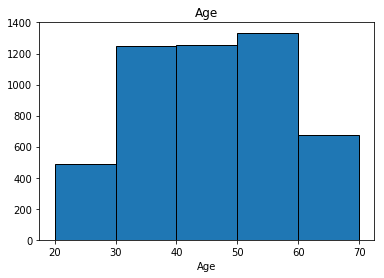

In [5]:
##frequency distribution of age
plt.hist(df1.Age, 5, range=(20, 70), edgecolor='black')
plt.title('Age')
plt.xlabel('Age')
plt.show()

The distribution of age in the given dataset looks close to normal. Hence the dataset maybe viewed as one which gives fair representation of all age groups. 

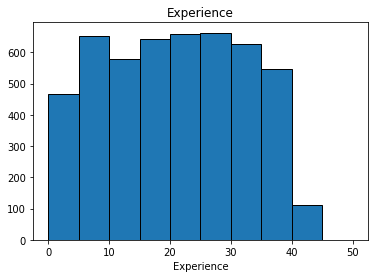

In [6]:
##frequency distribution of experience
plt.hist(df1.Experience, 10, range=(0, 50), edgecolor='black')
plt.title('Experience')
plt.xlabel('Experience')
plt.show()

The distribution of experience in the given dataset looks close to a uniform distribution. Hence the dataset maybe viewed as one which gives fair representation of all experience groups. 

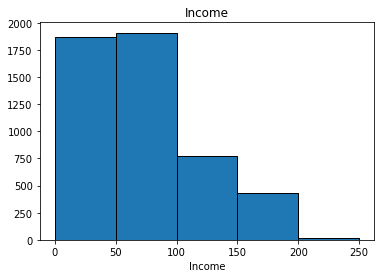

In [7]:
##frequency distribution of income
plt.hist(df1.Income, 5, range=(0, 250), edgecolor='black')
plt.title('Income')
plt.xlabel('Income')
plt.show()

The distribution of income in the given dataset looks slightly right-skewed. Hence there might arise a need to remove outlier rows based on this feature. The same inference can also be made from the boxplot shown below.

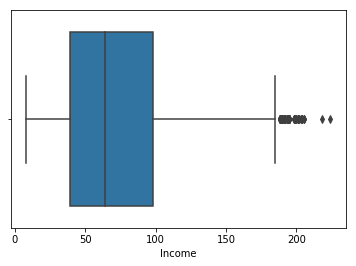

In [8]:
sns.boxplot(x=df1["Income"])

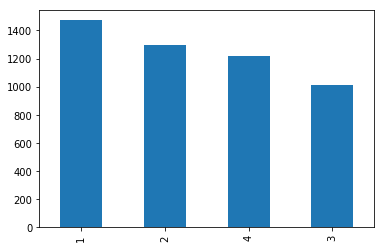

In [9]:
##frequency distribution of number of family members
df1["Family"].value_counts().plot(kind='bar')
plt.show()

The different family member counts seem to be proportionately represented in the dataset. 

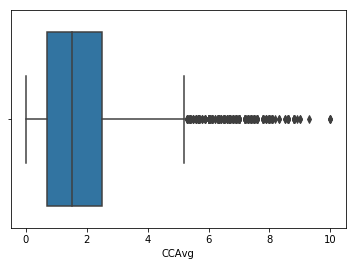

In [10]:
## 5-point summary of average monthly credit card billing
sns.boxplot(x=df1["CCAvg"])

The distribution looks right skewed and might call for removal of outlier rows. 

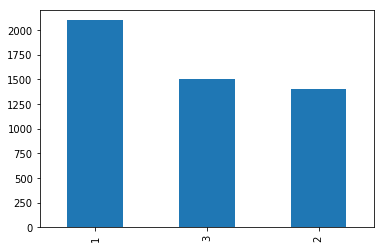

In [11]:
##frequency distribution of number of education levels
df1["Education"].value_counts().plot(kind='bar')
plt.show()

The three levels of education seem to be reasonably represented in the dataset,  with the number of advanced/professionals slightly more than the other levels. 

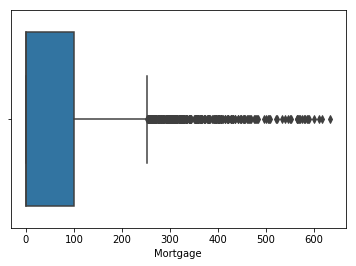

In [12]:
sns.boxplot(x=df1["Mortgage"])

The mortgage variable is highly right skewed in the given dataset, which is evident from the boxplot above & the frequency distribution below. 

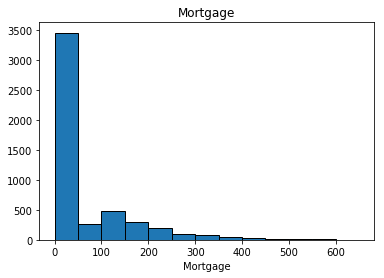

In [13]:
plt.hist(df1.Mortgage, 13, range=(0, 650), edgecolor='black')
plt.title('Mortgage')
plt.xlabel('Mortgage')
plt.show()

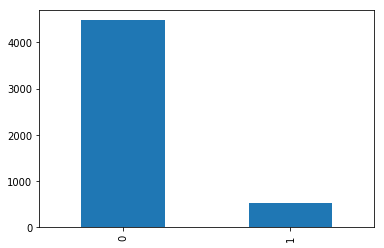

In [14]:
##frequency distribution of securities account availed or not
df1["Securities Account"].value_counts().plot(kind='bar')
plt.show()

The number of people who have availed securities accounts are nominal compared with the number of those not availed.

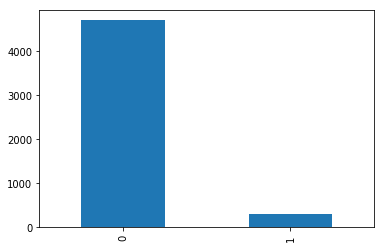

In [15]:
##frequency distribution of CD account availed or not
df1["CD Account"].value_counts().plot(kind='bar')
plt.show()

The number of people who have availed CD accounts are nominal compared with the number of those not availed.

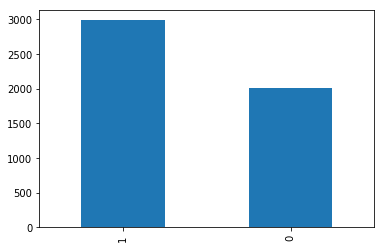

In [16]:
##frequency distribution of internet banking availed or not
df1["Online"].value_counts().plot(kind='bar')
plt.show()

More number of people in the given dataset are using internet banking than those not using the same. However the number of people who are not using internet banking is quite high. 

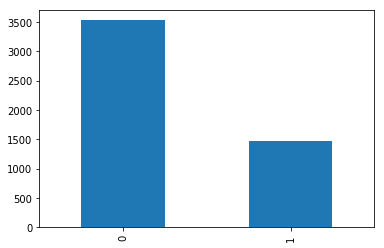

In [17]:
##frequency distribution of usage of universal bank credit card
df1["CreditCard"].value_counts().plot(kind='bar')
plt.show()

A large chunk of the people in the dataset do not use the Universal Bank credit card. 

QUESTION 3 - Get the target column distribution. Your comments

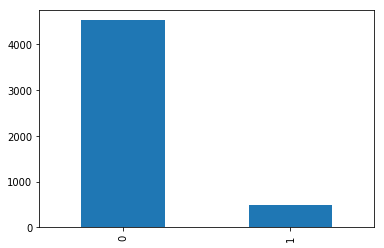

In [18]:
##frequency distribution of those who availed personal loan or not
df1["Personal Loan"].value_counts().plot(kind='bar')
plt.show()

In [19]:
##checking for null values
df1.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No null values found.

In [20]:
##checking the number of unique Zip Codes in the dataset
len(df1['ZIP Code'].unique().tolist())

467

Since there are 467 unique zipcodes, we attempt to reduce the number of levels to a number less than 6 inorder to achieve better model performance. 

However, when we examine the zip codes in the given dataset it is understood that all the given zip codes belong to the US state of California. Hence the possibility of grouping by states is ruled out. 

Further, if we look at the county level which is the next lower administrative level, the state of California has 58  counties. Hence the possibility of grouping by counties is ruled out. 

Hence we decide to drop the column 'ZIP Codes'

The column 'ID' can also be dropped. 

In [21]:
##dropping the columns ID & ZIP Codes
df1.drop(columns = ["ID", "ZIP Code"], inplace = True)
df1.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0


In [22]:
##removing outliers from the columns Income & CCAvg
a = df1["Income"].quantile(0.25)
b = df1["Income"].quantile(0.75)
IQR1 = b-a

df1_noout1 = df1[~((df1["Income"] < (a - 1.5 * IQR1)) |(df1["Income"] > (b + 1.5 * IQR1)))]

c = df1_noout1["CCAvg"].quantile(0.25)
d = df1_noout1["CCAvg"].quantile(0.75)
IQR2 = d-c

df1_noout2 = df1_noout1[~((df1_noout1["CCAvg"] < (c - 1.5 * IQR2)) |(df1_noout1["CCAvg"] > (d + 1.5 * IQR2)))]

print(df1_noout1.shape)
print(df1_noout2.shape)

(4904, 12)
(4623, 12)


The describe function showed the minimum value of Experience column as -3. Hence we investigate further to check if there are  more negative values in the Experience column

In [23]:
##displaying all rows wtih negative values under the Experience column
dftemp = df1_noout2[(df1_noout2['Experience'] < 0)]  
dftemp.shape

(47, 12)

There are 47 rows with negative values under the Experience column. If we look closer, we can see that all these rows have the value 'ZERO' under personal loan column which means that these persons have not availed a personal loan, swhich is our target variable.

Under this circumstance, we have 2 options:

1. replace all the negative values with some logical value based on the corresponding values of age, education & income. 
2. drop these rows entirely 
3. check with the client if the actual values can be obtained.

Exploring option 1 - The task would be tedious & impractical as the number of rows are too large for individual examination. 

Exploring option 2 - All these rows have the value 'ZERO' under personal loan column and the client(Thera Bank) is looking to find potential customers for personal loans. Since these customers are non-personal loan customers & if we replace negative values under the Experience column with other values randomly, then there is a possbility that a model built on such data could lead to possible loss of potential customers - that is, the model could predict an actual potential customer as a '0' when it could have been '1' (a false negative).

If we drop these rows and in the event that a false positive arises (when a potentioal non-customer is precidted by the model as a potential customer), it is still not a loss to the bank. 

Hence we decide to drop these 47 rows with negative values under the Experience column. 

In [24]:
##dropping the rows with Experience shown as negative values
df1_final = df1_noout2[df1_noout2["Experience"] >= 0]
df1_final.shape

(4576, 12)

47 rows were removed and the final dataframe has 4576 rows & 12 columns. 

In [25]:
import seaborn as sns

In [26]:
##Separating the independent & target variables
X = df1_final.drop(columns="Personal Loan")
Y = df1_final["Personal Loan"]

QUESTION 4 - Split the data into training and test set in the ratio of 70:30 respectively

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

QUESTION 5 - Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

QUESTION 6 - Print the confusion matrix for all the above models (5 points)

LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
import warnings 
warnings.filterwarnings('ignore')

In [32]:
##fitting a logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
##printing the predicted values for the testing set
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
##printing classification report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1279
           1       0.80      0.59      0.67        94

   micro avg       0.96      0.96      0.96      1373
   macro avg       0.88      0.79      0.83      1373
weighted avg       0.96      0.96      0.96      1373



In [35]:
##printing the confusion matrix
confusion_matrix(Y_test,predictions)

array([[1265,   14],
       [  39,   55]], dtype=int64)

In [36]:
accuracy_score(Y_test, predictions, normalize=True, sample_weight=None)

0.9613983976693372

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [38]:
##cross validated AUC scores
kfold = KFold(n_splits = 10, random_state =1)
scoring = 'roc_auc'
results = cross_val_score(logmodel, X, Y, cv=kfold, scoring = scoring)
print("AUC: %0.3f" %(results.mean()))

AUC: 0.965


KNN

In [39]:
from scipy.stats import zscore

In [40]:
##scaling the independent variables
X_train_scaled = zscore(X_train)
X_test_scaled = zscore(X_test)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
##printing accuracy scores and cross validated AUC scores
for k in (3,5,7,9):
    k_value = k
    neigh = KNeighborsClassifier(n_neighbors = k_value, metric = 'euclidean', algorithm  = 'auto')
    neigh.fit(X_train_scaled, Y_train) 
    y_pred = neigh.predict(X_test_scaled)
    print("Accuracy is", accuracy_score(Y_test, y_pred)," for K-Value:", k_value)
    
    kfold2 = KFold(n_splits = 10, random_state =1)
    scoring = 'roc_auc'
    results = cross_val_score(neigh, X, Y, cv=kfold2, scoring = scoring)
    print("AUC: %0.3f" %(results.mean()))
    

Accuracy is 0.9715950473415877  for K-Value: 3
AUC: 0.827
Accuracy is 0.9672250546249089  for K-Value: 5
AUC: 0.869
Accuracy is 0.9599417334304443  for K-Value: 7
AUC: 0.889
Accuracy is 0.9621267297887837  for K-Value: 9
AUC: 0.900


In [43]:
##printing the confusion matrix
confusion_matrix(Y_test,y_pred)

array([[1278,    1],
       [  51,   43]], dtype=int64)

In [44]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1279
           1       0.98      0.46      0.62        94

   micro avg       0.96      0.96      0.96      1373
   macro avg       0.97      0.73      0.80      1373
weighted avg       0.96      0.96      0.96      1373



Naïve Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
##fitting a Naive_Bayes model
gaussmod = GaussianNB()
gaussmod.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
predicted = gaussmod.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
##printing classification report
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1279
           1       0.44      0.64      0.52        94

   micro avg       0.92      0.92      0.92      1373
   macro avg       0.71      0.79      0.74      1373
weighted avg       0.94      0.92      0.93      1373



In [49]:
##printing the confusion matrix
confusion_matrix(Y_test,predicted)

array([[1204,   75],
       [  34,   60]], dtype=int64)

In [50]:
accuracy_score(Y_test, predicted)

0.9206117989803351

In [51]:
kfold3 = KFold(n_splits = 10, random_state =1)
scoring = 'roc_auc'
results = cross_val_score(gaussmod, X, Y, cv=kfold2, scoring = scoring)
print("AUC: %0.3f" %(results.mean()))

AUC: 0.937


QUESTION 7 - Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Comparing the accuracy scores and AUC scores of all the three models, logistic regression seems to be the better model for this case. 

The logistic regression model has the best AUROC of 0.965 compared with the AUROC values of 0.9 for KNN and 0.937 for the Naive-Bayes models. 

Logistic regression performs better when the actual decision boundaries are linear. The dataset in this case clearly has linear decision boundaries as evident from the results. 